In [1]:
from  sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy.plotting import plot3d as sp_plot3d

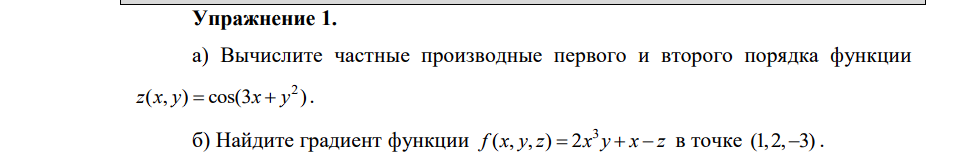

In [2]:
x  = Symbol('x')
y  = Symbol('y')
z  = Symbol('z')
f = cos( 3*x + y**2 )

pprint(f" по x: {diff(f,x)} | по y: {diff(f,y)} ")

 по x: -3*sin(3*x + y**2) | по y: -2*y*sin(3*x + y**2) 


In [3]:
f = 2*x**3*y + x - z

d1 = diff(f,x).subs(x,1).subs(y,2).subs(z,-3)
d2 = diff(f,y).subs(x,1).subs(y,2).subs(z,-3)
d3 = diff(f,z).subs(x,1).subs(y,2).subs(z,-3)

pprint(f" grad = ( { d1 }; { d2 }; { d3 } ) ")

 grad = ( 13; 2; -1 ) 


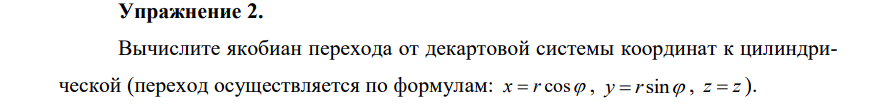

In [4]:
r = Symbol(" r ")
t = Symbol(" t ")
x = r*cos(t)
y = r*sin(t)
z = z

A = Matrix( [ [x,y,z] ] )
B = Matrix( [ [diff(A,r)], [diff(A,t)], [diff(A,z)] ])
#pprint(B.T)
pprint( f" J ={simplify(B.det() )}" )


 J = r 


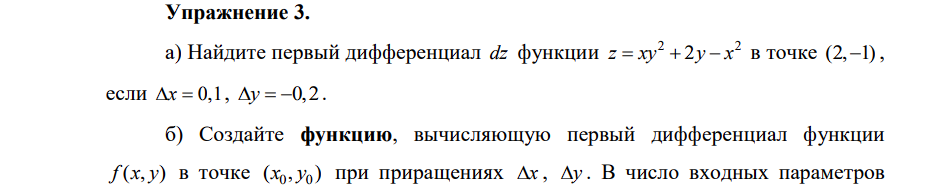

In [5]:
def Dif1(f, x, y, x0, y0, dx, dy, dx0, dy0 ):
    D = diff(f,x)*dx + diff(f,y)*dy
    D0 = D.subs( [ (x, x0), (y,y0), (dx, dx0), (dy, dy0)] )
    pprint( f"df = {D} | df(x0,y0) = {D0:.4} " )

dx = Symbol('dx')
dy = Symbol('dy')
x = Symbol('x')
y = Symbol('y')

Dif1(x*y**2 + 2*y - x**2, x, y, 2, -1, dx, dy, 0.1, -0.2 )

df = dx*(-2*x + y**2) + dy*(2*x*y + 2) | df(x0,y0) = 0.1000 


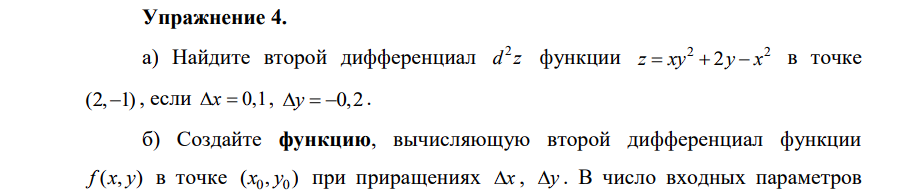

In [6]:
def Dif2(f, x, y, x0, y0, dx, dy, dx0, dy0 ):

    D = diff(f,x,2) * dx**2 + 2 * diff( diff(f,x), y )*dx*dy + diff(f,y, 2) * dy**2

    D0 = D.subs( [ (x, x0), (y,y0), (dx, dx0), (dy, dy0)] )

    pprint( f"df = {D} | df(x0,y0) = {D0:.4} " )

dx = Symbol('dx')
dy = Symbol('dy')
x = Symbol('x')
y = Symbol('y')

Dif2(x*y**2 + 2*y - x**2, x, y, 2, -1, dx, dy, 0.1, -0.2 )

df = -2*dx**2 + 4*dx*dy*y + 2*dy**2*x | df(x0,y0) = 0.2200 


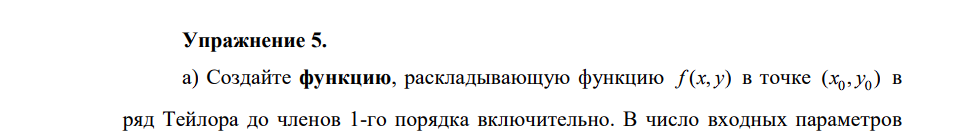

In [65]:
def Taylor1(f, x, y, x0, y0, dx, dy,dx0, dy0 ):

    D = f.subs( [(x,x0), (y,y0)] ) + diff(f,x)*dx + diff(f,y)*dy 

    D0 = D.subs( [ (x, x0), (y,y0), (dx, dx0), (dy,dy0)] )

    pprint( f"f = { D.evalf() }" )
    pprint( f"f(x0,y0) = {D0}")

dx = Symbol('dx')
dy = Symbol('dy')
x = Symbol('x')
y = Symbol('y')

f = x*y**2 + 2*y - x**2
Taylor1(f, x, y, 0.8, 2.8,dx,dy, 2, 2 )
print(" ")
print(f"Первое приближение: {11.3592}" )
print(f"Точное значение: {f.subs( [( x, 0.8), (y, 2.8)] ).evalf()}" )

f = dx*(-2.0*x + y**2) + dy*(2.0*x*y + 2.0) + 11.232
f(x0,y0) = 36.6720000000000
 
Первое приближение: 11.3592
Точное значение: 11.2320000000000


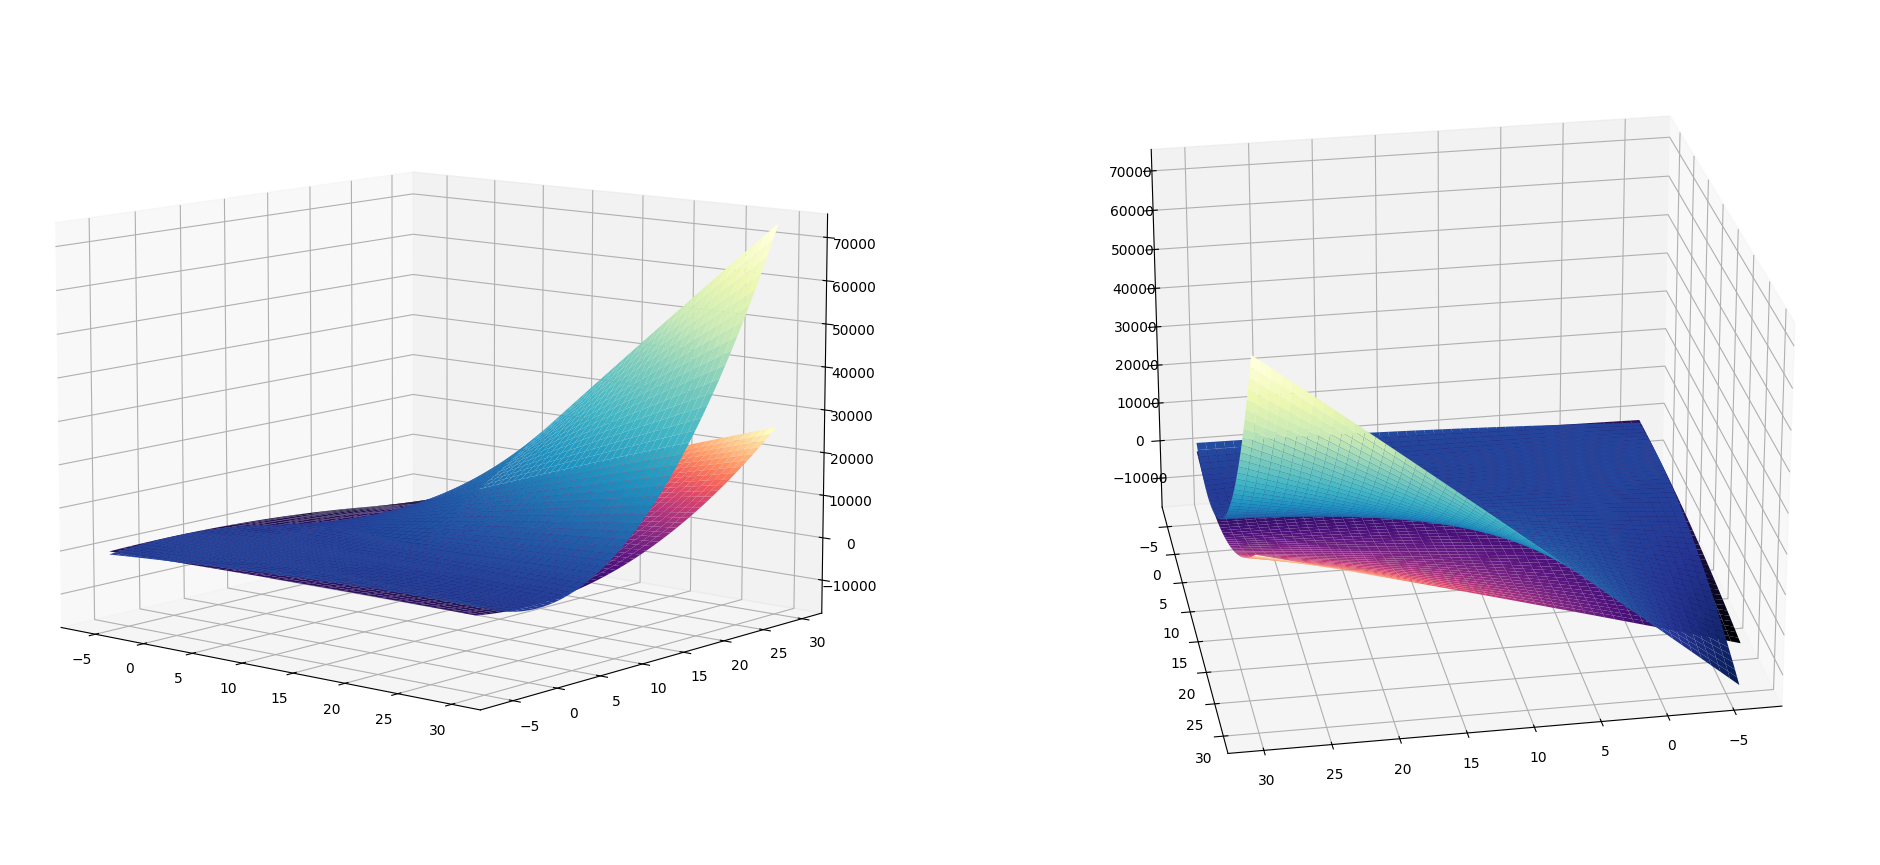

In [39]:


x = np.linspace(-6, 30, 50)
y = np.linspace(-6, 30, 50)
X, Y = np.meshgrid(x, y)

P = X * Y**2 + 2 * Y - X**2
P1 = (-2*X + Y**2)*(X - 0.8) + (Y - 2.8)*(2*X*Y + 2)

fig = plt.figure(figsize=(24, 24))

cmap_1 = plt.get_cmap('magma')
cmap_2 = cm.YlGnBu_r

ax = fig.add_subplot(1, 2, 1, projection='3d')
surface = ax.plot_surface(X, Y, P, cmap = cmap_1, linewidth = 0)
surface = ax.plot_surface(X, Y, P1, cmap = cmap_2, linewidth = 0)
ax.view_init(10, -50)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surface = ax.plot_surface(X, Y, P, cmap = cmap_1, linewidth = 0)
surface = ax.plot_surface(X, Y, P1, cmap = cmap_2, linewidth = 0)
ax.view_init(25, 80)



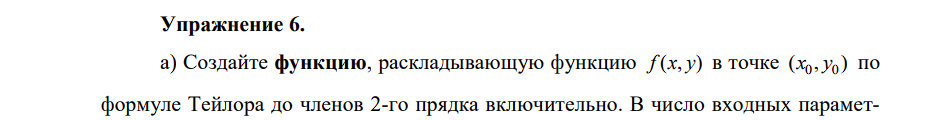

In [47]:
def Taylor2(f, x, y, x0, y0, dx, dy, dx0, dy0 ):

    D = f.subs( [(x,x0), (y,y0)] ) + diff(f,x)*dx + diff(f,y)*dy + ( diff(f,x,2) * dx**2 + 2 * diff( diff(f,x), y ) * dx * dy + diff(f,y, 2) * dy**2 ) * 0.5

    D0 = D.subs( [ (x, x0), (y,y0), (dx,dx0), (dy, dy0) ] )

    pprint( f"f = { simplify(D.evalf()) }" )
    pprint( f"f(x0,y0) = {D0}")

dx = Symbol('dx')
dy = Symbol('dy')
x = Symbol('x')
y = Symbol('y')

f = x*y**2 + 2*y - x**2
Taylor2(f, x, y, 0.8, 2.8,dx,dy,0.001, 0.001 )
print(" ")
print(f"Первое приближение: {11.3592}" )
print(f"Второе приближение: {11.2444}" )
print(f"Точное значение: {f.subs( [( x, 0.8), (y, 2.8)] ).evalf()}" )

f = -1.0*dx**2 + 2.0*dx*dy*y - dx*(2.0*x - y**2) + 1.0*dy**2*x + 2.0*dy*(x*y +
 1) + 11.232
f(x0,y0) = 11.2447254000000
 
Первое приближение: 11.3592
Второе приближение: 11.2444
Точное значение: 11.2320000000000


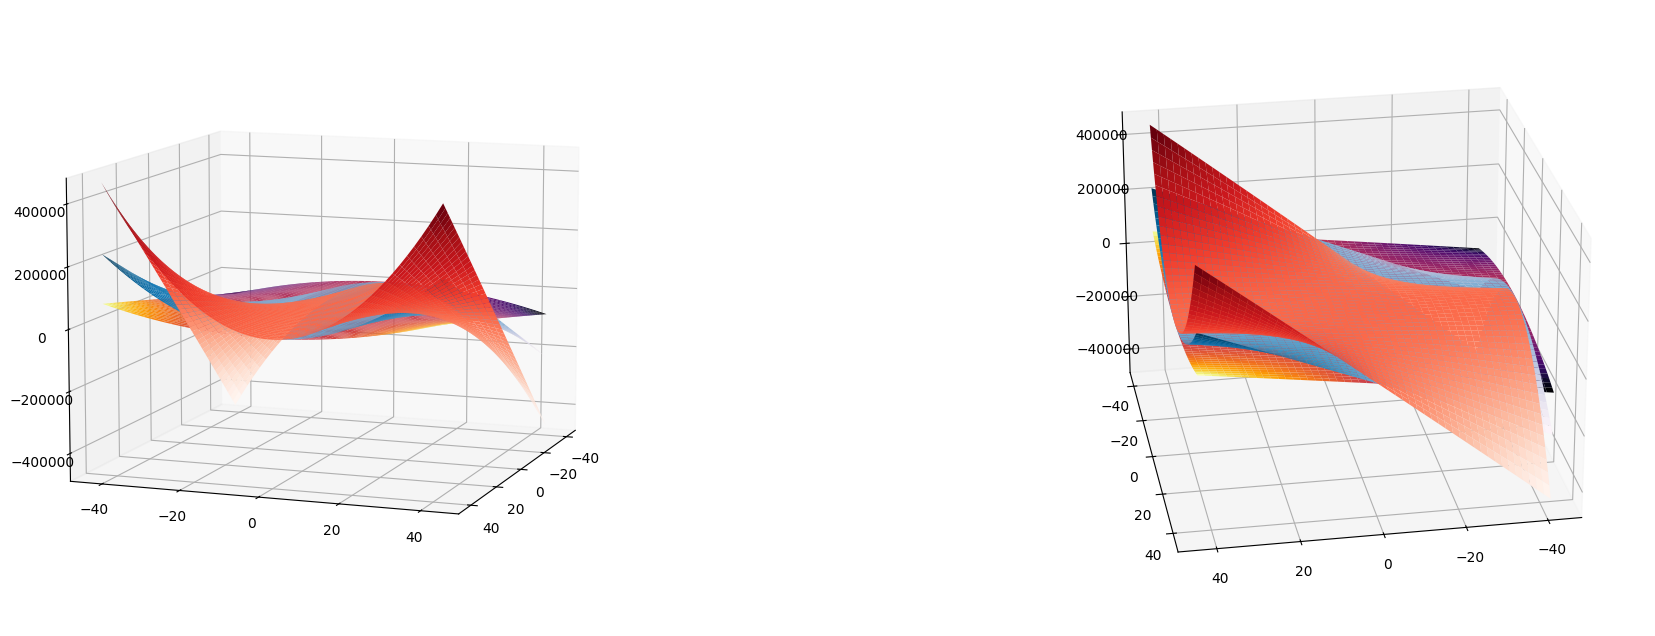

In [43]:

x = np.linspace(-42, 43, 50)
y = np.linspace(-42, 43, 50)
X, Y = np.meshgrid(x, y)

P = X * Y**2 + 2 * Y - X**2
P1 = (-2*X + Y**2)*(X - 0.8) + (Y - 2.8)*(2*X*Y + 2)
P2 = (-2 * X + Y**2) * (X - 0.8) + (X - 0.8)*(-2*X + 2*Y*(Y -2.8) + 4)/2 + (Y + 1)*( 2 * X * Y + 2) + (Y - 2.8)*( 2 * X * (Y - 2.8) + 2 * Y * (X - 0.8))/2

fig = plt.figure(figsize=(24, 8))



ax = fig.add_subplot(1, 2, 1, projection='3d')
surface = ax.plot_surface(X, Y, P, cmap = "inferno", linewidth = 0)
surface = ax.plot_surface(X, Y, P1, cmap = "PuBu", linewidth = 0)
surface = ax.plot_surface(X, Y, P2, cmap = 'Reds', linewidth = 0)
ax.view_init(10, 20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surface = ax.plot_surface(X, Y, P, cmap = "inferno", linewidth = 0)
surface = ax.plot_surface(X, Y, P1, cmap = 'PuBu', linewidth = 0)
surface = ax.plot_surface(X, Y, P2, cmap = 'Reds', linewidth = 0)
ax.view_init(25, 80)


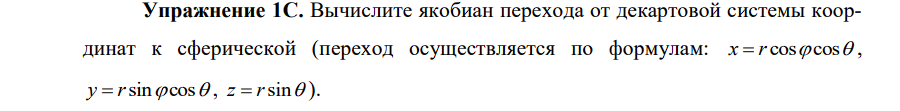

In [11]:
r = Symbol(" r ")
t = Symbol(" t ")
p = Symbol(" p ")

x = r*cos(t)*cos(p)
y = r*cos(p)*sin(t)
z = r*sin(p)

A = Matrix( [ [x,y,z] ] )
B = Matrix( [ [diff(A,r)], [diff(A,t)], [diff(A,p)] ])
#pprint(B.T)
pprint( f" J ={simplify(B.det() )}" )

 J = r **2*cos( p )


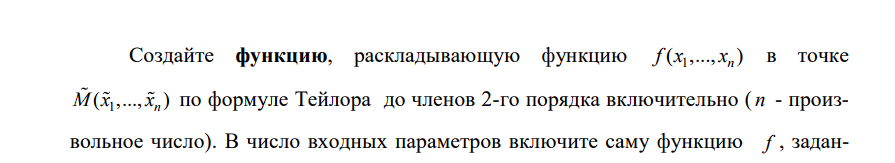

In [58]:
x1, x2, x3, x4, x5 = symbols("x1 x2 x3 x4 x5")
dx1, dx2, dx3, dx4, dx5 = symbols("dx1 dx2 dx3 dx4 dx5")
f = x1 * x2 + x3**3 * x4**2 - x5**4
dx_values = [0.1, -0.2, 0.15, -0.1, 0.05]
Point =     [  2,   -1,    0,    1,   -2]
variables_ = [ x1,  x2,  x3,  x4,  x5]
diffs_     = [dx1, dx2, dx3, dx4, dx5]

def find_differential_fn(f, variables, diffs, order_arg):
    differentials = [[f]]
    for i in range(order_arg):
        differentials.append([])
    for order in range(order_arg):
        for func in differentials[order]:
            differential = 0
            for var_dif in range(len(variables)):
                differential += diff(func, variables[var_dif]) * diffs[var_dif]
            differentials[order + 1].append(differential)
    return differentials   

for i in range(7):
    print(f"Differential : {find_differential_fn(f, variables_, diffs_, i)[i][0]}")
    print(f"OD sum : { sum( find_differential_fn(f, variables_, diffs_, i)[n][0].subs([(x1, Point[0]), (dx1, dx_values[0]), (x2, Point[1]), (dx2, dx_values[1]), (x3, Point[2]), (dx3, dx_values[2]), (x4, Point[3]), (dx4, dx_values[3]), (x5, Point[4]), (dx5, dx_values[4])]) / factorial(n) for n in range(i + 1))}")
    print()
print("Exact value :", f.subs([ (x1, Point[0] + dx_values[0]), (x2, Point[1] + dx_values[1]), (x3, Point[2] + dx_values[2]), (x4, Point[3] + dx_values[3]), (x5, Point[4] + dx_values[4])  ]))

Differential : x1*x2 + x3**3*x4**2 - x5**4
OD sum : -18

Differential : dx1*x2 + dx2*x1 + 3*dx3*x3**2*x4**2 + 2*dx4*x3**3*x4 - 4*dx5*x5**3
OD sum : -16.9000000000000

Differential : 2*dx1*dx2 + dx3*(6*dx3*x3*x4**2 + 6*dx4*x3**2*x4) + dx4*(6*dx3*x3**2*x4 + 2*dx4*x3**3) - 12*dx5**2*x5**2
OD sum : -16.9800000000000

Differential : dx3*(dx3*(6*dx3*x4**2 + 12*dx4*x3*x4) + dx4*(12*dx3*x3*x4 + 6*dx4*x3**2)) + dx4*(6*dx3*dx4*x3**2 + dx3*(12*dx3*x3*x4 + 6*dx4*x3**2)) - 24*dx5**3*x5
OD sum : -16.9756250000000

Differential : dx3*(dx3*(12*dx3*dx4*x4 + dx4*(12*dx3*x4 + 12*dx4*x3)) + dx4*(12*dx3*dx4*x3 + dx3*(12*dx3*x4 + 12*dx4*x3))) + dx4*(12*dx3**2*dx4*x3 + dx3*(12*dx3*dx4*x3 + dx3*(12*dx3*x4 + 12*dx4*x3))) - 24*dx5**4
OD sum : -16.9763062500000

Differential : 120*dx3**3*dx4**2
OD sum : -16.9762725000000

Differential : 0
OD sum : -16.9762725000000

Exact value : -16.9762725000000
